In [1]:
#dependency install
# %pip install pandas
# %pip install openpyxl

In [2]:
#imports
import csv
import pandas as pd
import hw0
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

In [3]:
class HierarchicalClusteringHW1(hw0.HierarchicalClustering):
    def __init__(self, cluster_dist, return_distances=False, return_for_dendrogram=False):
        # the function that measures distances clusters (lists of data vectors)
        self.cluster_dist = cluster_dist

        # if the results of run() also needs to include distances;
        # if true, each joined pair in also described by a distance.
        self.return_distances = return_distances
        self.return_for_dendrogram = return_for_dendrogram

    def run(self, data):
        """
        Performs hierarchical clustering until there is only a single cluster left
        and return a recursive structure of clusters.
        """

        # clusters stores current clustering. It starts as a list of lists
        # of single elements, but then evolves into lists like
        # [[["Albert"], [["Branka"], ["Cene"]]], [["Nika"], ["Polona"]]]
        clusters = [[name] for name in data.keys()]

        if self.return_for_dendrogram:
            linkages = []

        while len(clusters) >= 2:
            first, second, distance = self.closest_clusters(data, clusters)
            # update the "clusters" variable

            if self.return_for_dendrogram:
                linkages.append([first, second, distance, 2])
            
            firstIndex, secondIndex = clusters.index(first), clusters.index(second)
            if self.return_distances:
                newClusters = [ [clusters[firstIndex], clusters[secondIndex], distance] ]
            else:
                newClusters = [ [clusters[firstIndex], clusters[secondIndex]] ]
            for cluster in clusters:
                if cluster == first or cluster == second: continue
                newClusters.append(cluster)
            clusters = newClusters

        return (clusters,) if not self.return_for_dendrogram else (clusters, linkages)

In [4]:
NAN = float("nan")

### Reading the data

In [5]:
# #read CSV
# rawDataHeader = []
# rawData = []
# with open("eurovision_song_contest_1957_2023.csv") as csvfile:
#     reader = csv.reader(csvfile, delimiter=",")
#     rawDataHeader = next(reader)
#     for row in reader:
#         rawData.append(row)

In [6]:
pathOriginalDataFile = "data/eurovision_song_contest_1957_2023.xlsx"
origDataFrame = pd.read_excel(pathOriginalDataFile)

In [7]:
origDataFrame.keys()[6]

'Points      '

In [8]:
#fixing this bug-inducing column/attribute name
oldkey = origDataFrame.keys()[6]
newkey = origDataFrame.keys()[6].rstrip()
print("\"{}\"".format(oldkey))
print("\"{}\"".format(newkey))
origDataFrame.rename(columns={oldkey : newkey}, inplace=True)

"Points      "
"Points"


In [9]:
origDataFrame.keys()[6]

'Points'

## Version 1

### Data preparation

Poskusimo tako, da oblikujemo tabelo, kjer so vrstice glasujoče države, stolpci pa države, za katere so glasovale. V celicah so števila točk glasovanja. Stolpci z glasovi so za vsako leto posebej, leta dodamo tabeli (širimo v desno).

In [10]:
#drop entries that aren't for finals
prep1orig = origDataFrame[origDataFrame["(semi-) final"] == "f"]

In [11]:
# to je kr neki, ne dela - pridejo razlicno dolgi vektorji

# #extract uniques
# prep1years = prep1orig["Year"].unique()
# prep1voters = prep1orig["From country"].unique()
# prep1votedFor = prep1orig["To country"].unique()

# #prepare the data structure
# prep1data = {}
# for voterCountry in prep1voters:
#     prep1data[voterCountry] = {"keys" : [], "votes" : []}

# #fill the structure with data
# for year in prep1years:
#     yearSelection = prep1orig[prep1orig["Year"] == year]
#     for voterCountry in prep1voters:
#         voterSelection = yearSelection[yearSelection["From country"] == voterCountry]
#         for row in voterSelection.iterrows():
#             prep1data[voterCountry]["keys"].append((row[1]["To country"], year))
#             prep1data[voterCountry]["votes"].append(row[1]["Points"])

In [12]:
# for item in prep1data.items():
#     print(item[0])
#     print(len(item[1]["keys"]))
#     print(len(item[1]["votes"]))
#     print()

In [13]:
prep1years = prep1orig["Year"].unique()
prep1voters = prep1orig["From country"].unique()
prep1votedFor = prep1orig["To country"].unique()

prep1data = {}
for i in range(len(prep1voters)):
    voter = prep1voters[i]
    prep1data[voter] = []

for year in prep1years:
    yearSelection = prep1orig[prep1orig["Year"] == year]
    for voter in prep1voters:
        voterSelection = yearSelection[yearSelection["From country"] == voter]
        newVotes = []
        for votedFor in prep1votedFor:
            lineSelection = voterSelection[voterSelection["To country"] == votedFor]
            newVoteVal = NAN
            if len(lineSelection["Points"].values) > 0:
                newVoteVal = lineSelection["Points"].values[0]
            newVotes.append(newVoteVal)
        prep1data[voter] += newVotes

### Clustering

In [14]:
#params
distance1 = hw0.euclidean_dist
linkage1 = hw0.single_linkage
distFun1 = lambda c1, c2: linkage1(c1, c2, distance1)

In [15]:
hc1 = HierarchicalClusteringHW1(distFun1, False, True)
clusters1 = hc1.run(prep1data)

### Visualization

In [16]:
vis1codex = [[v] for v in prep1voters]
linkages1 = clusters1[1]
for line in linkages1:
    if line[0] not in vis1codex:
        vis1codex.append(line[0])
    if line[1] not in vis1codex:
        vis1codex.append(line[1])
    line[0] = vis1codex.index(line[0])
    line[1] = vis1codex.index(line[1])


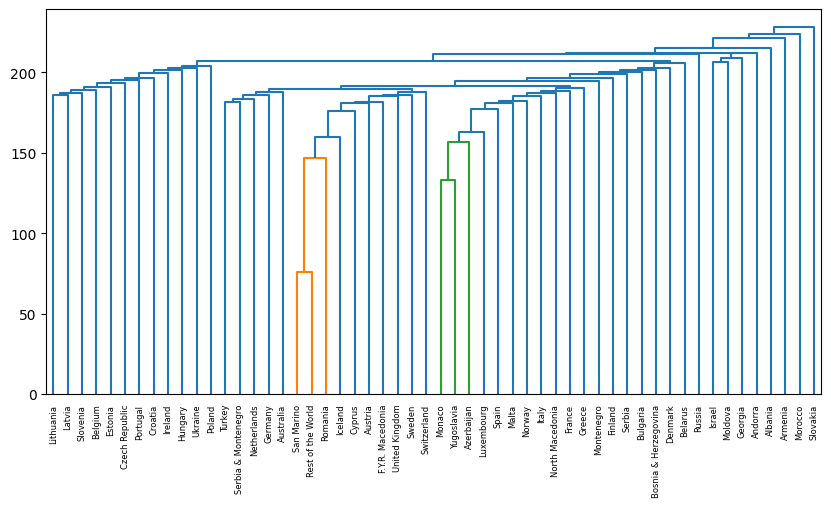

In [17]:
# Plot dendrogram
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(linkages1, labels=prep1voters)

# Show plot
plt.show()